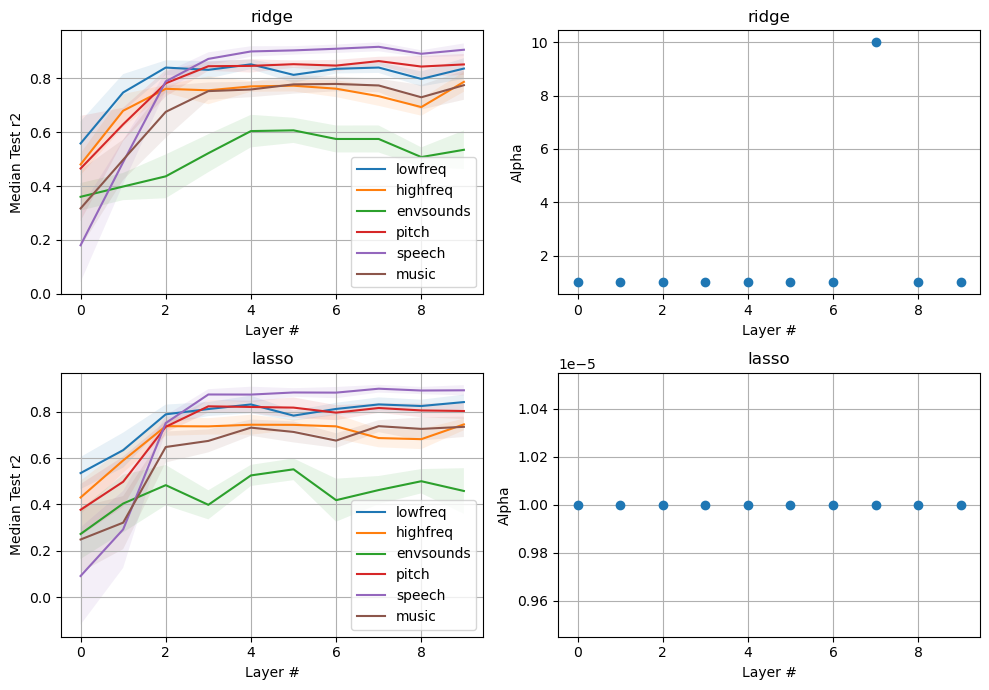

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 7))

save_path = f'/home/tppicml/braindnn/results_test/mel256-ec-base/'

for idx, model_name in enumerate(['ridge', 'lasso']):
    
    model_path = save_path + f'{model_name}/'

    f = open(model_path + f'{model_name}_scores.pkl', 'rb')
    all_test_r2 = pickle.load(f)
    f.close()

    f = open(model_path + f'{model_name}.pkl', 'rb')
    models = pickle.load(f)
    f.close()

    alphas = [model.alpha_ for model in models]

    median_test_r2 = np.median(all_test_r2,axis=1)
    std_test_r2 = np.std(all_test_r2,axis=1)

    componen_labels = ['lowfreq', 'highfreq', 'envsounds', 'pitch', 'speech', 'music']
    # Plot r2
    for c in range(6):
        axs[idx, 0].plot(np.arange(10), median_test_r2[:,c], label=componen_labels[c])
        axs[idx, 0].fill_between(np.arange(10), y1=median_test_r2[:,c] - std_test_r2[:,c], y2=median_test_r2[:,c] + std_test_r2[:,c], alpha=0.1)
    
    axs[idx, 0].legend()
    axs[idx, 0].set_xlabel('Layer #')
    axs[idx, 0].set_ylabel('Median Test r2')
    axs[idx, 0].set_title(f'{model_name}')
    axs[idx, 0].grid()

    # Plot alphas
    axs[idx, 1].plot(np.arange(10), alphas, 'o')
    axs[idx, 1].set_xlabel('Layer #')
    axs[idx, 1].set_ylabel('Alpha')
    axs[idx, 1].set_title(f'{model_name}')
    axs[idx, 1].grid()

fig.tight_layout()
plt.savefig(save_path + f'models_alphas.png')